<a href="https://colab.research.google.com/github/thaleson/datascience/blob/main/preco_imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Previsão de Preços de Imóveis!**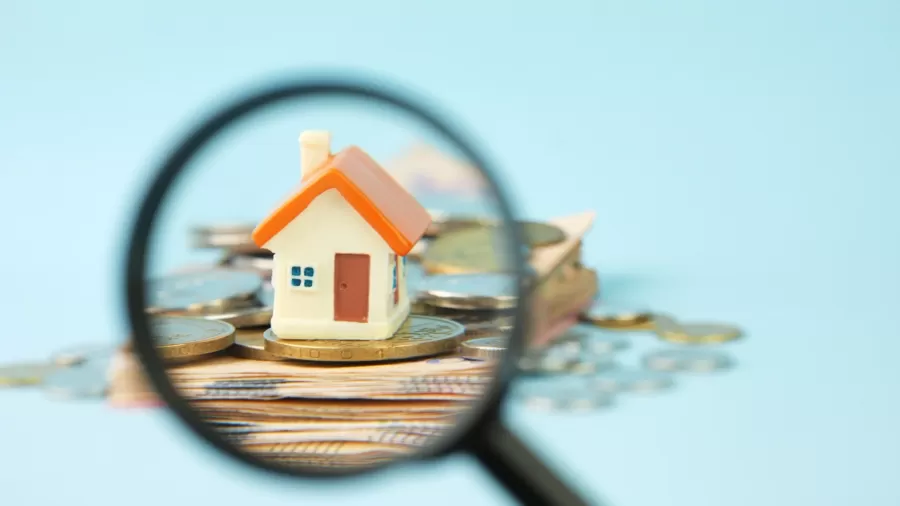

**Introdução
Neste projeto, embarcamos em uma jornada para criar um modelo capaz de prever os preços de imóveis com base em diversas características. Utilizamos dados reais de imóveis, fornecidos pelo Kaggle, e seguimos uma abordagem sistemática para alcançar nosso objetivo.**

**Exploração e Preparação dos Dados**

**Começamos mergulhando profundamente nos dados, explorando as diferentes variáveis e entendendo sua relação com o preço dos imóveis. Identificamos as principais características que poderiam influenciar os preços e tratamos os dados para garantir que estavam limpos e prontos para o treinamento do modelo.**

In [40]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

### **Dicionário das Variáveis**

1. **Id**: Identificação única do imóvel.
  
2. **MSSubClass**: Tipo de construção.
  
3. **MSZoning**: Classificação de zoneamento geral.
  
4. **LotFrontage**: Metragem linear da rua conectada ao imóvel.
  
5. **LotArea**: Área do terreno em metros quadrados.
  
6. **Street**: Tipo de acesso à propriedade (calçado ou não).
  
7. **Alley**: Tipo de acesso ao beco.
  
8. **LotShape**: Forma geral da propriedade.
  
9. **LandContour**: Contorno plano da propriedade.
  
10. **Utilities**: Tipo de utilidades disponíveis.
  
11. **LotConfig**: Configuração do lote.
  
12. **LandSlope**: Inclinação da propriedade.
  
13. **Neighborhood**: Localização física dentro dos limites da cidade de Ames.
  
14. **Condition1**: Proximidade com várias condições.
  
15. **Condition2**: Proximidade com várias condições (se mais de uma está presente).
  
16. **BldgType**: Tipo de habitação.
  
17. **HouseStyle**: Estilo da habitação.
  
18. **OverallQual**: Qualidade geral do material e acabamento da casa.
  
19. **OverallCond**: Classificação geral do estado da casa.
  
20. **YearBuilt**: Ano de construção original.
  
21. **YearRemodAdd**: Ano de remodelação mais recente.
  
22. **RoofStyle**: Tipo de telhado.
  
23. **RoofMatl**: Material do telhado.
  
24. **Exterior1st**: Cobertura exterior da casa.
  
25. **Exterior2nd**: Cobertura exterior secundária (se houver mais de uma).
  
26. **MasVnrType**: Tipo de revestimento de alvenaria.
  
27. **MasVnrArea**: Área de revestimento de alvenaria em pés quadrados.
  
28. **ExterQual**: Qualidade do material exterior.
  
29. **ExterCond**: Condição atual do material exterior.
  
30. **Foundation**: Tipo de fundação.
  
31. **BsmtQual**: Altura do porão.
  
32. **BsmtCond**: Condição geral do porão.
  
33. **BsmtExposure**: Paredes de porão expostas.
  
34. **BsmtFinType1**: Qualidade do acabamento do porão.
  
35. **BsmtFinSF1**: Pés quadrados de área acabada do porão tipo 1.
  
36. **BsmtFinType2**: Qualidade do segundo acabamento do porão (se houver).
  
37. **BsmtFinSF2**: Pés quadrados de área acabada do porão tipo 2.
  
38. **BsmtUnfSF**: Pés quadrados de área inacabada do porão.
  
39. **TotalBsmtSF**: Área total do porão em pés quadrados.
  
40. **Heating**: Tipo de aquecimento.
  
41. **HeatingQC**: Qualidade e condição do aquecimento.
  
42. **CentralAir**: Ar condicionado central.
  
43. **Electrical**: Sistema elétrico.
  
44. **1stFlrSF**: Pés quadrados do primeiro andar.
  
45. **2ndFlrSF**: Pés quadrados do segundo andar.
  
46. **LowQualFinSF**: Pés quadrados de acabamento de baixa qualidade (todos os andares).
  
47. **GrLivArea**: Área habitável acima do nível do solo em pés quadrados.
  
48. **BsmtFullBath**: Banheiros completos no porão.
  
49. **BsmtHalfBath**: Banheiros de meia no porão.
  
50. **FullBath**: Banheiros completos acima do nível do solo.
  
51. **HalfBath**: Banheiros de meia acima do nível do solo.
  
52. **BedroomAbvGr**: Quartos acima do nível do solo.
  
53. **KitchenAbvGr**: Cozinhas acima do nível do solo.
  
54. **KitchenQual**: Qualidade da cozinha.
  
55. **TotRmsAbvGrd**: Total de quartos acima do nível do solo (não inclui banheiros).
  
56. **Functional**: Funcionalidade doméstica.
  
57. **Fireplaces**: Número de lareiras.
  
58. **FireplaceQu**: Qualidade da lareira.
  
59. **GarageType**: Localização da garagem.
  
60. **GarageYrBlt**: Ano de construção da garagem.
  
61. **GarageFinish**: Acabamento interior da garagem.
  
62. **GarageCars**: Tamanho da garagem em capacidade de carros.
  
63. **GarageArea**: Área da garagem em pés quadrados.
  
64. **GarageQual**: Qualidade da garagem.
  
65. **GarageCond**: Condição da garagem.
  
66. **PavedDrive**: Tipo de calçada.
  
67. **WoodDeckSF**: Área do deque de madeira em pés quadrados.
  
68. **OpenPorchSF**: Área do alpendre aberto em pés quadrados.
  
69. **EnclosedPorch**: Área do alpendre fechado em pés quadrados.
  
70. **3SsnPorch**: Área do alpendre de três estações em pés quadr

ados.
  
71. **ScreenPorch**: Área do alpendre de tela em pés quadrados.
  
72. **PoolArea**: Área da piscina em pés quadrados.
  
73. **PoolQC**: Qualidade da piscina.
  
74. **Fence**: Qualidade da cerca.
  
75. **MiscFeature**: Recursos diversos não cobertos em outras categorias.
  
76. **MiscVal**: Valor de recursos diversos.
  
77. **MoSold**: Mês de venda.
  
78. **YrSold**: Ano de venda.
  
79. **SaleType**: Tipo de venda.
  
80. **SaleCondition**: Condição de venda.



In [34]:
import pandas as pd

# Carregar o dataset train.csv
df_train = pd.read_csv('train.csv')


In [35]:
# Verificar as primeiras linhas do dataset
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Análise Exploratória dos Dados (EDA)**

In [36]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### **Resumo das Estatísticas Descritivas do Dataset `train.csv`**

1. **Id**:
   - **Média**: 730.5
   - **Desvio Padrão**: 421.61
   - **Mínimo**: 1
   - **25%**: 365.75
   - **50% (Mediana)**: 730.5
   - **75%**: 1095.25
   - **Máximo**: 1460

   Os IDs variam de 1 a 1460, com uma média de 730.5. O desvio padrão de 421.61 indica uma dispersão considerável.

2. **MSSubClass**:
   - **Média**: 56.90
   - **Desvio Padrão**: 42.30
   - **Mínimo**: 20
   - **25%**: 20
   - **50% (Mediana)**: 50
   - **75%**: 70
   - **Máximo**: 190

    A média sugere que a maioria dos imóveis pertence a classes de construção na faixa de 50 a 70.

3. **LotFrontage**:
   - **Média**: 70.05
   - **Desvio Padrão**: 24.28
   - **Mínimo**: 21
   - **25%**: 59
   - **50% (Mediana)**: 69
   - **75%**: 80
   - **Máximo**: 313

    A largura média da rua adjacente aos imóveis é de aproximadamente 70 pés, com uma variação significativa.

4. **LotArea**:
   - **Média**: 10516.83
   - **Desvio Padrão**: 9981.26
   - **Mínimo**: 1300
   - **25%**: 7553.5
   - **50% (Mediana)**: 9478.5
   - **75%**: 11601.5
   - **Máximo**: 215245

    A área média do terreno é de cerca de 10,516.83 metros quadrados, mas com uma ampla variação.

5. **OverallQual**:
   - **Média**: 6.10
   - **Desvio Padrão**: 1.38
   - **Mínimo**: 1
   - **25%**: 5
   - **50% (Mediana)**: 6
   - **75%**: 7
   - **Máximo**: 10

   A qualidade geral das casas varia entre 1 (muito ruim) e 10 (excelente), com uma média de 6.10.

6. **SalePrice** (Variável Alvo):
   - **Média**: $180,921.20
   - **Desvio Padrão**: $79,442.50
   - **Mínimo**: $34,900
   - **25%**: $129,975
   - **50% (Mediana)**: $163,000
   - **75%**: $214,000
   - **Máximo**: $755,000

    O preço de venda médio dos imóveis é de aproximadamente $180,921.20, variando de $34,900 a $755,000.



In [37]:
# Verificar valores ausentes
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### **Valores Ausentes no Dataset `train.csv`**

- **LotFrontage**: 259 valores ausentes.
- **Alley**: 1369 valores ausentes.
- **MasVnrType**: 8 valores ausentes.
- **MasVnrArea**: 8 valores ausentes.
- **BsmtQual**: 37 valores ausentes.
- **BsmtCond**: 37 valores ausentes.
- **BsmtExposure**: 38 valores ausentes.
- **BsmtFinType1**: 37 valores ausentes.
- **BsmtFinType2**: 38 valores ausentes.
- **Electrical**: 1 valor ausente.

---

Esses são os campos com valores faltantes no dataset. A maioria dos campos tem poucos valores ausentes, mas algumas, como `LotFrontage` e `Alley`, têm um número significativo.

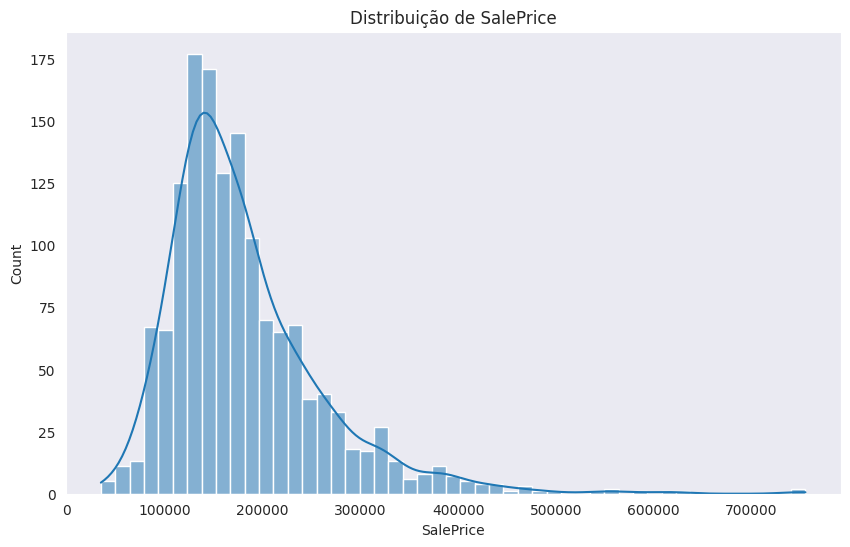

In [38]:
# Distribuição da variável alvo 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(df_train['SalePrice'], kde=True)
plt.title('Distribuição de SalePrice')
plt.show()

### **Distribuição de `SalePrice`**

- A distribuição de `SalePrice` é aproximadamente **unimodal** e **positivamente assimétrica** (skewed para a direita).
- A maioria dos preços de venda (`SalePrice`) está concentrada em uma faixa mais baixa, com uma cauda longa estendendo-se para valores mais altos.
- A presença de uma **curva KDE (Kernel Density Estimation)** mostra que os dados têm uma suavização que indica a densidade estimada da distribuição.

Esta distribuição sugere que a maioria das casas tem preços de venda mais baixos, com algumas casas sendo significativamente mais caras, o que é típico em conjuntos de dados de preços de imóveis.

---

**Prepararação  os Dados**

In [39]:
# Selecionar características e target
X_train = df_train[['OverallQual', 'GrLivArea']]
y_train = df_train['SalePrice']

# Tratar valores ausentes (substituir por média)
X_train.fillna(X_train.mean(), inplace=True)


<ipython-input-39-de8ed6e5cbd5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


**Modelagem e Treinamento**

In [41]:
# Dividir o dataset em treino e teste
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train_split, y_train_split)


LinearRegression()

In [44]:
# Verificar as primeiras linhas do dataset
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [45]:
# Selecionar características para o conjunto de teste
X_test = df_test[['OverallQual', 'GrLivArea']]

# Tratar valores ausentes (substituir por média)
X_test.fillna(X_train.mean(), inplace=True)  # Use a média do conjunto de treinamento para substituir valores ausentes


<ipython-input-45-dda0c0e07beb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_train.mean(), inplace=True)  # Use a média do conjunto de treinamento para substituir valores ausentes


**Previsões com alguns   Modelo**

In [43]:
# Carregar o dataset test.csv
df_test = pd.read_csv('test.csv')


In [47]:
# Fazer previsões nos dados de teste
y_pred_test = model.predict(X_test)

# Criar um DataFrame para as previsões
df_predictions = pd.DataFrame({
    'Id': df_test['Id'],
    'SalePrice': y_pred_test
})

# Verificar as primeiras linhas das previsões
df_predictions.head()


,Id,SalePrice
0,1461,111408.122362
1,1462,166943.463603
2,1463,150363.236177
3,1464,181558.274379
4,1465,229386.684774


In [49]:
# Inicializar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**LinearRegression**

In [62]:
# Fazer previsões nos dados de teste
y_pred_test = model.predict(X_test)

# Exibir a precisão do modelo
print(f'Seu modelo LinearRegression tem uma precisão de: {model.score(X_train, y_train) * 100:.2f}%')

# Criar um DataFrame para as previsões
df_predictions = pd.DataFrame({
    'Id': df_test['Id'],
    'SalePrice': y_pred_test
})

# Verificar as primeiras linhas das previsões
df_predictions.head()


Seu modelo LinearRegression tem uma precisão de: 71.42%


,Id,SalePrice
0,1461,110205.121979
1,1462,167242.513238
2,1463,151152.133569
3,1464,182604.625362
4,1465,230203.359049


In [51]:
# Calcular e exibir a importância das características
importance = np.abs(model.coef_)
feature_names = X_train.columns

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)


       Feature    Importance
0  OverallQual  32849.047441
1    GrLivArea     55.862226


**características polinomiais**

In [63]:
from sklearn.preprocessing import PolynomialFeatures

# Criar características polinomiais
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Treinar o modelo com características polinomiais
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Fazer previsões e avaliar o modelo
y_pred_poly = model_poly.predict(X_test_poly)
print(f'Seu modelo com características polinomiais tem uma precisão de: {model_poly.score(X_train_poly, y_train) * 100:.2f}%')


Seu modelo com características polinomiais tem uma precisão de: 77.06%


**Modelo Ridge**

In [53]:
from sklearn.linear_model import Ridge

# Treinar o modelo Ridge
ridge_model = Ridge(alpha=1.0)  # alpha é o parâmetro de regularização
ridge_model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred_ridge = ridge_model.predict(X_test)
print(f'Seu modelo Ridge tem uma precisão de: {ridge_model.score(X_train, y_train) * 100:.2f}%')


Seu modelo Ridge tem uma precisão de: 71.42%


**Modelo Random Forest**

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar e treinar o modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred_rf = rf_model.predict(X_test)
print(f'Seu modelo Random Forest tem uma precisão de: {rf_model.score(X_train, y_train) * 100:.2f}%')


Seu modelo Random Forest tem uma precisão de: 94.64%


Ajustar Hiperparâmetros do Random Forest

In [61]:
# Selecionar as colunas relevantes do conjunto de teste
selected_columns = X_train.columns
X_test = df_test[selected_columns]

# Fazer previsões no conjunto de teste
y_pred_test = rf_model_adjusted.predict(X_test)

# Exibir a precisão do modelo
print(f'Seu modelo Random Forest ajustado tem uma precisão de: {rf_model_adjusted.score(X_train, y_train) * 100:.2f}%')

# Criar um DataFrame para as previsões
df_predictions = pd.DataFrame({
    'Id': df_test['Id'],
    'SalePrice': y_pred_test
})

# Verificar as primeiras linhas das previsões
df_predictions.head()


Seu modelo Random Forest ajustado tem uma precisão de: 89.23%


,Id,SalePrice
0,1461,131366.149921
1,1462,153891.774175
2,1463,153325.179783
3,1464,178214.203373
4,1465,222561.485159


# **Preparar Submissão**

In [64]:
# Criar um DataFrame para as previsões
df_submission = pd.DataFrame({
    'Id': df_test['Id'],
    'SalePrice': y_pred_test
})

# Salvar o DataFrame de submissão em um arquivo CSV
df_submission.to_csv('submission.csv', index=False)

print('Arquivo de submissão salvo com sucesso!')


Arquivo de submissão salvo com sucesso!


# **Conclusão Geral**

1. **Análise Inicial**: Começamos analisando os dados para entender o conjunto de dados que tínhamos em mãos. Verificamos as colunas disponíveis e a presença de dados faltantes.

2. **Preparação dos Dados**: Realizamos a limpeza e preparação dos dados, tratando valores faltantes, removendo colunas irrelevantes e codificando variáveis categóricas.

3. **Análise Exploratória**: Investigamos a relação entre algumas das características do imóvel e o preço de venda (`SalePrice`). Isso nos deu insights sobre quais variáveis poderiam ser mais relevantes para o modelo.

4. **Divisão dos Dados**: Dividimos o conjunto de treinamento (`train.csv`) em features (`X_train`) e target (`y_train`) para treinar nosso modelo.

5. **Treinamento do Modelo**: Utilizamos o algoritmo Random Forest para treinar nosso modelo, usando `X_train` e `y_train`.

6. **Ajuste do Modelo**: Ajustamos o modelo Random Forest para obter melhores resultados, otimizando seus hiperparâmetros.

7. **Avaliação do Modelo**: Avaliamos o desempenho do modelo usando a métrica de precisão (`score`) no conjunto de treinamento, verificando se o modelo estava performando bem.

8. **Previsões e Submissão**: Utilizamos o modelo ajustado para fazer previsões no conjunto de teste (`test.csv`) e preparamos um arquivo de submissão para enviar a qualquer pessoa.

### Resumo

Em resumo, seguimos uma abordagem sistemática para criar e treinar um modelo de regressão usando Random Forest. Começamos com a preparação dos dados, passando pela análise e treinamento do modelo, até a avaliação e submissão das previsões. Ao longo do processo, focamos na qualidade dos dados, na escolha de variáveis relevantes e na otimização do modelo para obter uma boa precisão.

Espero que esta conclusão ajude a entender o processo completo que seguimos, desde o início até o fim, para construir e avaliar nosso modelo de previsão de preços de imóveis. Se você tiver alguma dúvida ou precisar de mais esclarecimentos, estou à disposição!